## Data Pre-processing./ Exploratory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot  as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("traffic volume.csv")


### Reading dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


### Interpretations:::

##### **We have 7 columns and 48204 rows in the dataset**

##### **There are almost above 90 percent of null values to holiday column,so we can drop that column**

##### **There are 4 object,3 float,and one int data type columns**

### To know about the statistical distribution of the data , we can use describe method

In [10]:
df.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


### Missing values count for "holiday" column is more than 90 percent ,so we can drop holiday column::

In [12]:
## df.drop(columns =["holiday"],axis=1,inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            48151 non-null  float64
 1   rain            48202 non-null  float64
 2   snow            48192 non-null  float64
 3   weather         48155 non-null  object 
 4   date            48204 non-null  object 
 5   Time            48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


## Handling missing values ::

### **We have  missing values in the data set , there are some methods to fill those missing values**

### for numerical ::
1. median imputation
2. mode imputation
3. mean imputation
   
### for categorical or object types::
1. mode imputation
2. forward/backward fill
3. placeholder imputations can be used

### **Relacing Missing values for Numerical columns using mean imputation**

In [16]:
import pandas as pd

def fill_missing_with_mean(df):
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        df[column].fillna(df[column].mean(), inplace=True)
    return df


df = fill_missing_with_mean(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            48204 non-null  float64
 1   rain            48204 non-null  float64
 2   snow            48204 non-null  float64
 3   weather         48155 non-null  object 
 4   date            48204 non-null  object 
 5   Time            48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


### **Replacing Missing Values For categorical data , using "place holder imputation"**
### **using mode imputation in order to fill the missing values of categorical datatype**

In [18]:

df["weather"].value_counts()

weather
Clouds          15144
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [20]:
df['weather'].fillna("Clouds", inplace=True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            48204 non-null  float64
 1   rain            48204 non-null  float64
 2   snow            48204 non-null  float64
 3   weather         48204 non-null  object 
 4   date            48204 non-null  object 
 5   Time            48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [24]:
df["weather"].value_counts()

weather
Clouds          15193
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

## Data Visualization::

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            48204 non-null  float64
 1   rain            48204 non-null  float64
 2   snow            48204 non-null  float64
 3   weather         48204 non-null  object 
 4   date            48204 non-null  object 
 5   Time            48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [28]:
df.head()

,temp,rain,snow,weather,date,Time,traffic_volume
0,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


### Splitting date column into date /month / year 

In [30]:
df[["day","month","year"]] = df["date"].str.split("-" , expand= True)

### Splitting date column into hours /minutes/ seconds

In [33]:
df[["hours","minutes","seconds"]] = df["Time"].str.split(":",expand= True)

In [35]:
df.drop(columns=["date","Time"],axis= 1,inplace=True)

In [37]:
df.head()

,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [39]:
from sklearn.preprocessing import OrdinalEncoder

weather_order = [
    'Clear', 'Mist', 'Clouds', 'Haze', 'Drizzle', 'Rain', 'Snow',
    'Fog', 'Smoke', 'Thunderstorm', 'Squall'
]
encoder = OrdinalEncoder(categories=[weather_order])

# Apply ordinal encoding to the 'weather' column
df['weather_encoded'] = encoder.fit_transform(df[['weather']])

In [40]:
df.drop(columns=["weather"],axis =1,inplace=True)

In [41]:
df.head()

,temp,rain,snow,traffic_volume,day,month,year,hours,minutes,seconds,weather_encoded
0,288.28,0.0,0.0,5545,02,10,2012,09,00,00,2.0
1,289.36,0.0,0.0,4516,02,10,2012,10,00,00,2.0
2,289.58,0.0,0.0,4767,02,10,2012,11,00,00,2.0
3,290.13,0.0,0.0,5026,02,10,2012,12,00,00,2.0
4,291.14,0.0,0.0,4918,02,10,2012,13,00,00,2.0


### The correlation matrix  reflects the relationships between the columns in the dataset. 

1. **Perfect Positive Correlation (1.000)
For example, Feature1 and Feature3 have a correlation of 1.000.
This means as Feature1 increases, Feature3 increases in the same proportion.
Reason: The values of these columns might be linearly related.**

2. **Perfect Negative Correlation (-1.000)
For example, Feature1 and Feature2 have a correlation of -1.000.
This means as Feature1 increases, Feature2 decreases proportionally.
Reason: These columns might be inversely related (e.g., one increases while the other decreases).**

3. **High Negative or Positive Correlation (Close to ±1)
Feature4 has a correlation of -0.990 with Feature1.
This indicates a very strong negative relationship, but not perfect.
Reason: Feature4 values might vary slightly compared to Feature1 but still show a nearly linear inverse trend.**


**NOTE :: CORRELATION MATRIX REQUIRES ONLY NUMERIC DATA ,IT CANNOT ACCEPT STRING/OBJECT/CATEGORY DATA**



### To see correaltion matrix - we want to convert object type to numerical type  because correlation does not accept string type

In [45]:
correlation_matrix = df.corr()
correlation_matrix

,temp,rain,snow,traffic_volume,day,month,year,hours,minutes,seconds,weather_encoded
temp,1.000000,0.009070,-0.019758,0.130034,0.022763,0.223837,0.134861,0.111811,NaN,NaN,0.019146
rain,0.009070,1.000000,-0.000090,0.004714,-0.002293,0.001298,0.000442,0.003421,NaN,NaN,0.009051
snow,-0.019758,-0.000090,1.000000,0.000735,0.015784,0.020420,-0.003530,0.009850,NaN,NaN,0.020555
traffic_volume,0.130034,0.004714,0.000735,1.000000,-0.007587,-0.002533,0.004753,0.352401,NaN,NaN,0.007550
day,0.022763,-0.002293,0.015784,-0.007587,1.000000,0.008614,0.012192,-0.009373,NaN,NaN,0.031772
month,0.223837,0.001298,0.020420,-0.002533,0.008614,1.000000,-0.158688,0.001865,NaN,NaN,0.015911
year,0.134861,0.000442,-0.003530,0.004753,0.012192,-0.158688,1.000000,-0.007542,NaN,NaN,0.021435
hours,0.111811,0.003421,0.009850,0.352401,-0.009373,0.001865,-0.007542,1.000000,NaN,NaN,-0.000433
minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seconds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

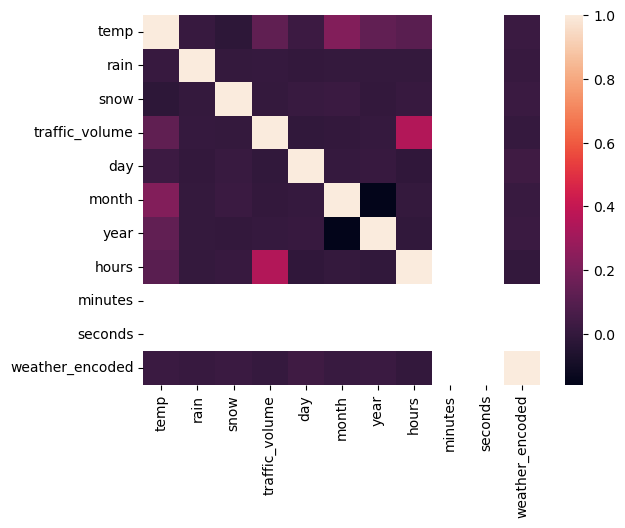

In [329]:
sns.heatmap(correlation_matrix)

### Pair Plot: Plot pairwise relationships in a dataset.

**A pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.
It also helps to form some simple classification models by drawing some simple lines or making a linear separation in our data-set.**

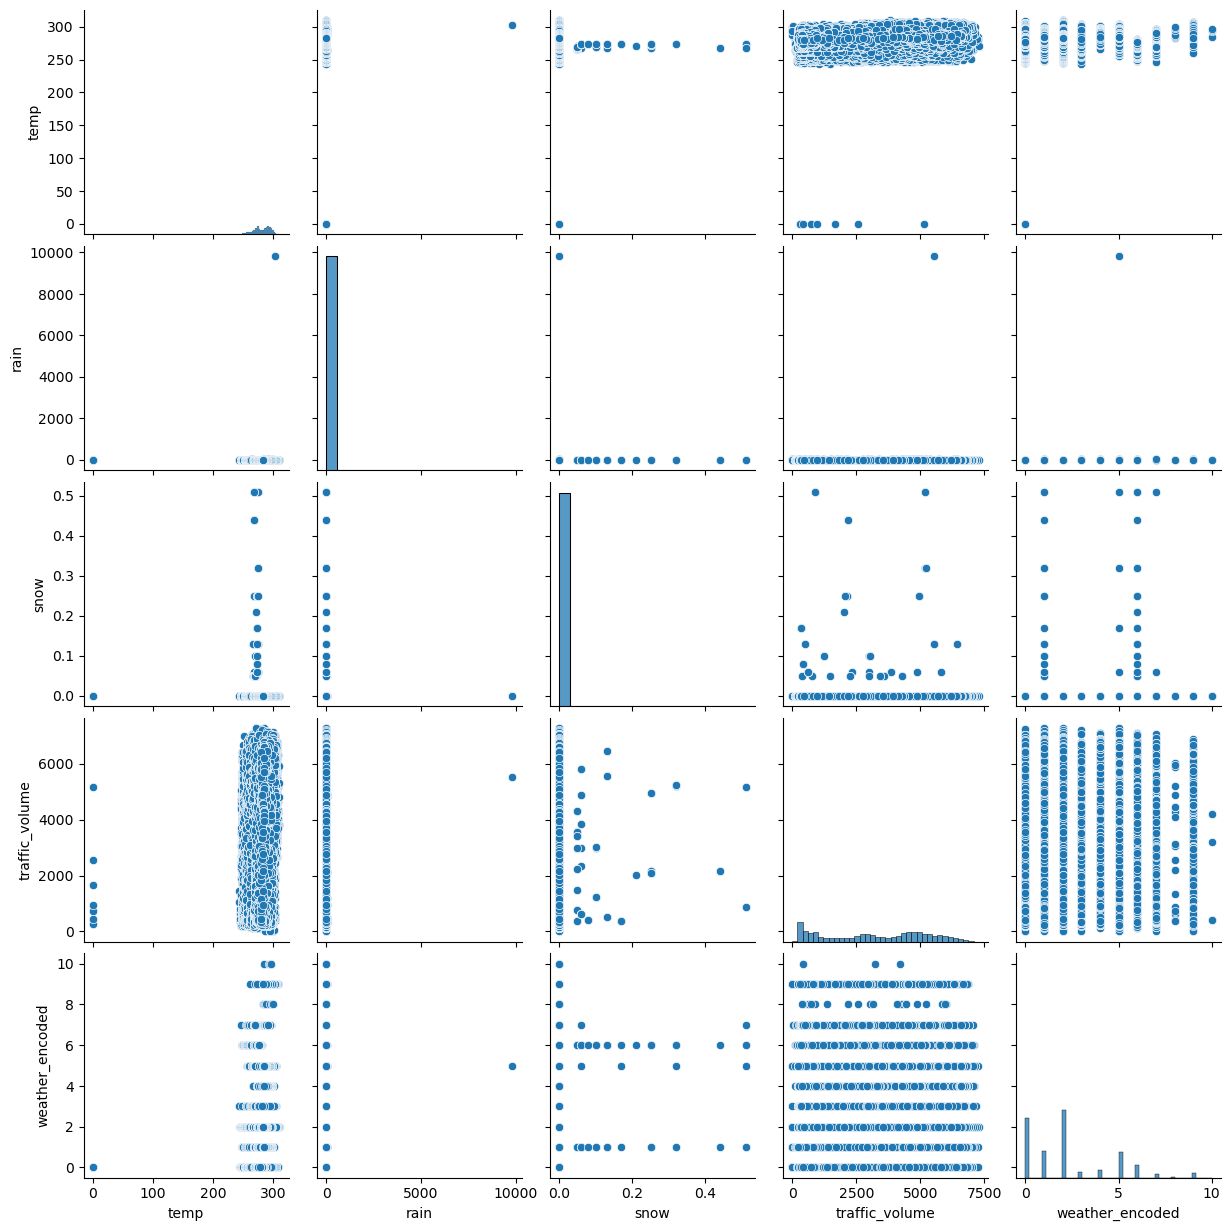

In [47]:
sns.pairplot(df)

### Box Plot:

**Box-plot is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and 
skewness through displaying the data quartiles (or percentiles) and averages.**

<Axes: >

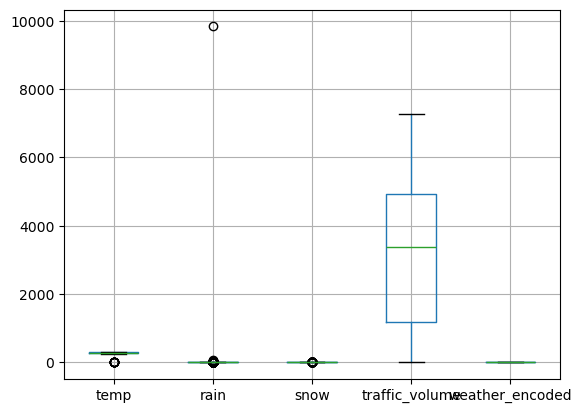

In [49]:
df.boxplot()

## **Splitting the Dataset into Dependent and Independent variable**

In [51]:
y = df["traffic_volume"] 

X = df.drop(columns=["traffic_volume"],axis=1)

In [53]:
X.head()

,temp,rain,snow,day,month,year,hours,minutes,seconds,weather_encoded
0,288.28,0.0,0.0,02,10,2012,09,00,00,2.0
1,289.36,0.0,0.0,02,10,2012,10,00,00,2.0
2,289.58,0.0,0.0,02,10,2012,11,00,00,2.0
3,290.13,0.0,0.0,02,10,2012,12,00,00,2.0
4,291.14,0.0,0.0,02,10,2012,13,00,00,2.0


In [55]:
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             48204 non-null  float64
 1   rain             48204 non-null  float64
 2   snow             48204 non-null  float64
 3   traffic_volume   48204 non-null  int64  
 4   day              48204 non-null  object 
 5   month            48204 non-null  object 
 6   year             48204 non-null  object 
 7   hours            48204 non-null  object 
 8   minutes          48204 non-null  object 
 9   seconds          48204 non-null  object 
 10  weather_encoded  48204 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.0+ MB


## Feature Engineering ::

### **converting categorical data to numerical**

#### **methods to do so::**

#### 1..label encoding

#### 2..One-hot encoding

#### 3.. Ordinal encoding


### **Applying feature scaling to numerical data**

#### **methods to do so::**

#### 1..Min Max scalar


#### 2..Standardization or Z -transform Scalar


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             48204 non-null  float64
 1   rain             48204 non-null  float64
 2   snow             48204 non-null  float64
 3   traffic_volume   48204 non-null  int64  
 4   day              48204 non-null  object 
 5   month            48204 non-null  object 
 6   year             48204 non-null  object 
 7   hours            48204 non-null  object 
 8   minutes          48204 non-null  object 
 9   seconds          48204 non-null  object 
 10  weather_encoded  48204 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.0+ MB


### using column transformer we can apply both changes at one time

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             48204 non-null  float64
 1   rain             48204 non-null  float64
 2   snow             48204 non-null  float64
 3   day              48204 non-null  object 
 4   month            48204 non-null  object 
 5   year             48204 non-null  object 
 6   hours            48204 non-null  object 
 7   minutes          48204 non-null  object 
 8   seconds          48204 non-null  object 
 9   weather_encoded  48204 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.7+ MB


In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
numerical_cols = X.select_dtypes(include='number')
categorical_cols =X.select_dtypes(include ="object")
transformer = ColumnTransformer(
    transformers=[
        ("t1", OrdinalEncoder(), [3,4,5,6,7,8,]),
        ("t2", MinMaxScaler(), [0,1,2,9]),
    ],
    remainder="passthrough"  
)
X_transformed = transformer.fit_transform(X)


### X_transformed is an array form so,before calling it we have to convert into dataframe 

In [66]:
X_transformed.shape

(48204, 10)

In [68]:
X_transformed =pd.DataFrame(X_transformed,columns=X.columns)
X_transformed.head()

,temp,rain,snow,day,month,year,hours,minutes,seconds,weather_encoded
0,1.0,9.0,0.0,9.0,0.0,0.0,0.929726,0.0,0.0,0.2
1,1.0,9.0,0.0,10.0,0.0,0.0,0.933209,0.0,0.0,0.2
2,1.0,9.0,0.0,11.0,0.0,0.0,0.933918,0.0,0.0,0.2
3,1.0,9.0,0.0,12.0,0.0,0.0,0.935692,0.0,0.0,0.2
4,1.0,9.0,0.0,13.0,0.0,0.0,0.938949,0.0,0.0,0.2


In [70]:
df["traffic_volume"].value_counts()

traffic_volume
353     50
356     50
340     47
351     44
373     42
        ..
6953     1
2057     1
2585     1
7118     1
2346     1
Name: count, Length: 6704, dtype: int64

## **Splitting the Dataset into Training and Testing**

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.2,random_state=42)

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38563, 10)
(38563,)
(9641, 10)
(9641,)


## **Model Building and Evaluation::**

In [87]:
from sklearn import linear_model, tree, ensemble, svm, metrics
import xgboost as xgb
import numpy as np
import pickle

def save_best_model(model, filename="best_model.pkl"):
    """
    Save the best model to a file.
    
    Args:
    model: Trained model to save.
    filename: Name of the file to save the model. Default is 'best_model.pkl'.
    """
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}")

def train_and_evaluate_models(x_train, y_train, x_test, y_test):
    # Initialize models
    models = {
        "Linear Regression": linear_model.LinearRegression(),
        "Decision Tree": tree.DecisionTreeRegressor(),
        "Random Forest": ensemble.RandomForestRegressor(),
        "Support Vector Regressor": svm.SVR(),
        "XGBoost": xgb.XGBRegressor(),
    }

    # Train models
    for name, model in models.items():
        model.fit(x_train, y_train)

    # Predict on test data
    predictions = {name: model.predict(x_test) for name, model in models.items()}

    # Calculate R-squared scores
    r2_scores = {name: metrics.r2_score(y_test, pred) for name, pred in predictions.items()}

    # Calculate RMSE for each model
    rmse_scores = {name: np.sqrt(metrics.mean_squared_error(y_test, pred)) for name, pred in predictions.items()}

    # Find the best model
    best_model_name = max(r2_scores, key=r2_scores.get)
    best_model = models[best_model_name]

    # Save the best model
    save_best_model(best_model, filename="best_model.pkl")

    return r2_scores, rmse_scores, best_model_name

# Example usage (replace x_train, y_train, x_test, y_test with actual data):
r2_scores, rmse_scores, best_model_name = train_and_evaluate_models(X_train, y_train, X_test, y_test)
print("R-squared Scores:", r2_scores)
print("RMSE Scores:", rmse_scores)
print("Best Model:", best_model_name)


Model saved as best_model.pkl
R-squared Scores: {'Linear Regression': 0.13831588299264175, 'Decision Tree': 0.6859340215515106, 'Random Forest': 0.8358711640503983, 'Support Vector Regressor': 0.3797810732247532, 'XGBoost': 0.8412762880325317}
RMSE Scores: {'Linear Regression': 1845.7193286720908, 'Decision Tree': 1114.2998269058012, 'Random Forest': 805.5343433789848, 'Support Vector Regressor': 1565.9003597307553, 'XGBoost': 792.1593245710633}
Best Model: XGBoost
